# konlpy를 활용한 형태소 분석- 워드클라우드 선행

- 형태소란 단어를 더 이상 나눌 수 없는 단위로 나눠놓은 단어입니다.

- konlpy는 한국어 단어를 더 나눌 수 없는 단위로 쪼갤 수 있는 라이브러리입니다.

- 우리가 통상적으로 사용하는 한국어 문장을 형태소 단위로 나누는 작업이 선행되어야 워드클라우드를 사용할 수 있습니다.

- konlpy document 주소(https://konlpy-ko.readthedocs.io/ko/v0.4.3/)

In [2]:
#konlpy 의 꼬꼬마 라이브러리 사용
from konlpy.tag import Kkma

In [4]:
#꼬꼬마 라이브러리 변수(객체) 생성
Kkma = Kkma()

TypeError: 'Kkma' object is not callable

In [15]:
#문자단위 입력
Kkma.sentences('김첨지는 말했다 설렁탕을 사왔는데 왜 먹지를 못하니')

['김 첨지는 말했다 설렁탕을 사 왔는데 왜 먹지를 못하니']

In [14]:
#명사 쪼개기
Kkma.nouns('김첨지는 말했다 설렁탕을 사왔는데 왜 먹지를 못하니')

['김', '김첨지', '첨지', '설렁탕', '먹지']

In [8]:
#전체 문장 형태소 단위로 쪼개기-리스트 내의 튜플
Kkma.pos('김첨지는 말했다 설렁탕을 사왔는데 왜 먹지를 못하니')

[('김', 'NNG'),
 ('첨지', 'NNG'),
 ('는', 'JX'),
 ('말하', 'VV'),
 ('었', 'EPT'),
 ('다', 'ECS'),
 ('설렁탕', 'NNG'),
 ('을', 'JKO'),
 ('사', 'VV'),
 ('아', 'ECS'),
 ('오', 'VX'),
 ('았', 'EPT'),
 ('는데', 'ECD'),
 ('왜', 'MAG'),
 ('먹지', 'NNG'),
 ('를', 'JKO'),
 ('못하', 'VX'),
 ('니', 'ECD')]

In [10]:
#한나눔 라이브러리 사용
from konlpy.tag import Hannanum

In [12]:
#한나눔 변수(객체)생성
hannanum = Hannanum()

In [13]:
hannanum.nouns('김첨지는 말했다 설렁탕을 사왔는데 왜 먹지를 못하니')

['김첨지', '말', '설렁탕', '먹지']

In [16]:
#품사표시 없이 문장 쪼개기-리스트로
hannanum.morphs('김첨지는 말했다 설렁탕을 사왔는데 왜 먹지를 못하니')

['김첨지',
 '는',
 '말',
 '하',
 '었다',
 '설렁탕',
 '을',
 '사',
 '아',
 '오',
 '아ㄴ데',
 '왜',
 '먹지',
 '를',
 '못하',
 '니']

In [17]:
#품사표시와 함께 문장 쪼개기
hannanum.pos('김첨지는 말했다 설렁탕을 사왔는데 왜 먹지를 못하니')

[('김첨지', 'N'),
 ('는', 'J'),
 ('말', 'N'),
 ('하', 'X'),
 ('었다', 'E'),
 ('설렁탕', 'N'),
 ('을', 'J'),
 ('사', 'P'),
 ('아', 'E'),
 ('오', 'P'),
 ('아ㄴ데', 'E'),
 ('왜', 'M'),
 ('먹지', 'N'),
 ('를', 'J'),
 ('못하', 'P'),
 ('니', 'E')]

In [52]:
from konlpy.tag import Twitter
twit=Twitter()

D:\asw\lib\site-packages\konlpy\tag\_okt.py:16: UserWarning: "Twitter" has changed to "Okt" since KoNLPy v0.4.5.
  warn('"Twitter" has changed to "Okt" since KoNLPy v0.4.5.')
D:\asw\lib\site-packages\jpype\_core.py:210: UserWarning: 
-------------------------------------------------------------------------------
Deprecated: convertStrings was not specified when starting the JVM. The default
behavior in JPype will be False starting in JPype 0.8. The recommended setting
for new code is convertStrings=False.  The legacy value of True was assumed for
this session. If you are a user of an application that reported this warning,
please file a ticket with the developer.
-------------------------------------------------------------------------------

  """)


In [24]:
twit.nouns('김첨지는 말했다 설렁탕을 사왔는데 왜 먹지를 못하니')

['김첨', '말', '설렁탕', '왜']

In [25]:
twit.morphs('김첨지는 말했다 설렁탕을 사왔는데 왜 먹지를 못하니')

['김첨', '지는', '말', '했다', '설렁탕', '을', '사왔는데', '왜', '먹지를', '못', '하니']

In [26]:
twit.pos('김첨지는 말했다 설렁탕을 사왔는데 왜 먹지를 못하니')

[('김첨', 'Noun'),
 ('지는', 'Josa'),
 ('말', 'Noun'),
 ('했다', 'Verb'),
 ('설렁탕', 'Noun'),
 ('을', 'Josa'),
 ('사왔는데', 'Verb'),
 ('왜', 'Noun'),
 ('먹지를', 'Verb'),
 ('못', 'VerbPrefix'),
 ('하니', 'Verb')]

# 워드 클라우드

- 워드 클라우드는 문장이나 글을 입력했을때 형태소 단위로 분석한 다음, 빈출단어 순으로 글꼴 크기를 다르게 해서 이미지화합니다.

- 시각적으로 빈출단어와 그렇지 않은 단어를 확인할 수 있도록 만들어주기 때문에 분석결과를 직관적으로 파악할 수 있습니다.

- 워드클라우드 공식 페이지(https://amueller.github.io/word_cloud/)를 참조해 워드클라우드 사용법을 파악해보겠습니다.

In [8]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pylab as plt
import numpy as np
from PIL import Image

### 스타워즈 시각화
- 스타워즈 대본 및 스톰 트루퍼 사진을 활용한 워드클라우드화 및 그냥 시각화 두 가지를 진행
- 스톰 트루퍼 사진(흑백화)을 사용하면 스톰 트루퍼 사진의 검은색 영역에만 워드클라우드가 형성됨
<img src='stormtrooper.png' width='350' height='350'>

In [16]:
#스타워즈 txt파일 내부의 텍스르자료를 파이썬 문자열 자료형으로 변환
starwars = open('starwars.txt', encoding='utf-8').read()

In [17]:
#배경자료를 줄지 말지 선택
background = np.array(Image.open('stormtrooper.png'))

In [18]:
#워드클라우드를 만들 때 제외할 단어 입력
stopwords=set(STOPWORDS)
stopwords.add('int')
stopwords.add('ext')

In [36]:
#시각화 틀에 자료 집어넣기
#background_color : 배경색
#max_words : 최대 몇 글자로 클라우드 구성
#mask : 배경에 사용할 그림파일 정보
#stopwords : 워드클라우드 생성시 배제할 단어
#margin :  그림 모서리 부분과 그림 시작점의 간격
#random_state : 그림 구성(숫자를 다르게 주면 단어 배치만 조금씩 바뀜)
#generate(영문자료) : 입력된 영문자료의 형태소 분석 + 워드클라우드화를 동시에 진행
wc = WordCloud(background_color='black', max_words=1000,
               mask=background, stopwords=stopwords, margin=10,random_state=100).generate(starwars)
#글씨 색깔 지정
default_colors=wc.to_array()

### imshow의 interpolation

- 경계를 어떻게 표시할지 지정할때 interpolation을 사용함

https://matplotlib.org/3.1.1/gallery/images_contours_and_fields/interpolation_methods.html

- 위 사이트에 옵션별 경계면 처리를 좀 더 상세히 확인 가능

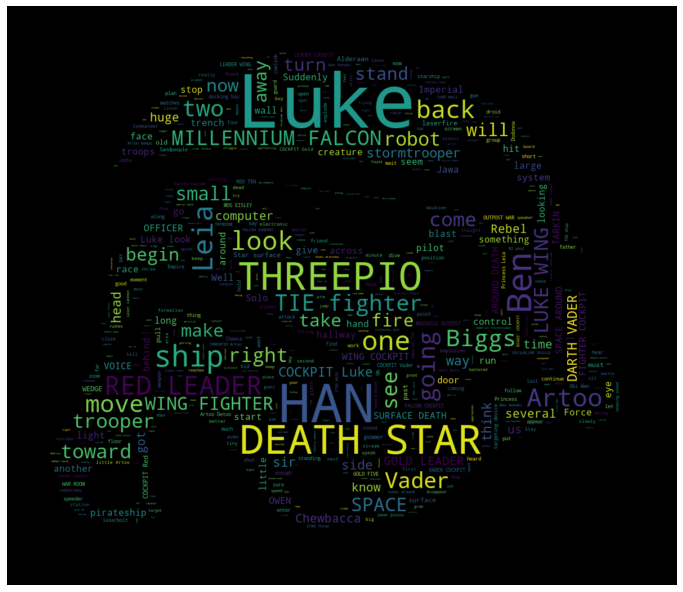

In [37]:
#시각화한 자료 화면에 표출하기
# 12*12크기로 출력
plt.figure(figsize=(12,12))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.show()

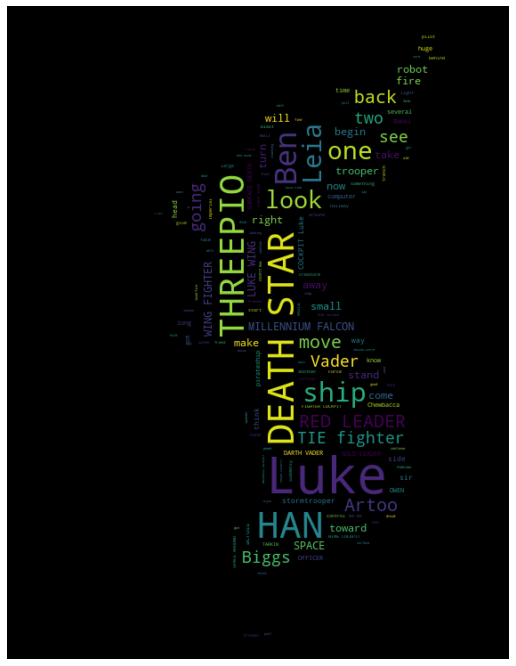

In [39]:
#뒷 배경이 검은색이며 배경그림이 kor.png인 워드클라우드
starwars = open('starwars.txt', encoding='utf-8').read()

wc = WordCloud(background_color='black', max_words=1000,
               mask=background, stopwords=stopwords, margin=10,random_state=100).generate(starwars)
#글씨 색깔 지정
default_colors=wc.to_array()
plt.figure(figsize=(12,12))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.show()

## 한국어를 이용한 워드클라우드

In [40]:
import nltk
#kobill은 한국어로 된 법조문 파일 10개를 담고있는 lib
from konlpy.corpus import kobill

In [43]:
#법조문 파일 10개 업로드
corp=kobill.fileids()
corp

['1809890.txt',
 '1809891.txt',
 '1809892.txt',
 '1809893.txt',
 '1809894.txt',
 '1809895.txt',
 '1809896.txt',
 '1809897.txt',
 '1809898.txt',
 '1809899.txt']

In [49]:
#위의 법조문 리스트 중 하나만 로드하기
doc_ko = kobill.open('1809895.txt').read()
doc_ko

'하도급거래 공정화에 관한 법률 일부개정법률안\n\n(유선호의원 대표발의 )\n\n 의 안\n 번 호\n\n9895\n\n발의연월일 : 2010.  11.  15.\n\n발  의  자 : 유선호․강기갑․김효석  \n\n조승수ㆍ최문순ㆍ조영택  \n\n문학진ㆍ백재현ㆍ송민순  \n\n박은수ㆍ정동영ㆍ김춘진  \n\n김재윤ㆍ우윤근ㆍ이성남  \n\n이종걸 의원(16인)\n\n제안이유 및 주요내용\n\n  원․수급사업자 사이의 하도급거래는 외형적으로 공정한 계약을 체\n\n결할지라도 교섭력에서 절대 우위에 있는 원사업자에 의한 불공정한 \n\n행위의 가능성은 여전히 상존하고 있음. 또한 수급사업자는 원사업자\n\n의 부당행위에 의하여 손해를 입게 된 경우에도 입증의 부담을 안기 \n\n때문에 민사소송에 의한 피해구제도 쉽지 않은 실정임.  \n\n  이에 서면에 의한 계약을 따르지 않을 경우 벌금에 처하도록 하고, \n\n손해배상에 있어서 입증책임을 원사업자에게 전환시키며, 법원이 추정\n\n에 의한 손해액의 인정을 할 수 있게 하여 수급사업자가 소송을 용의\n\n- 1 -\n\n\x0c- 2 -\n\n하게 진행할 수 있도록 함으로써 비대칭적인 교섭력과 정보력의 차이\n\n를 보완하고, 나아가 공정한 하도급거래 질서가 유지․발전 되도록 하\n\n려는 것임(안 제35조 및 제36조 신설). \n\n\x0c법률  제        호\n\n하도급거래 공정화에 관한 법률 일부개정법률안\n\n하도급거래 공정화에 관한 법률 일부를 다음과 같이 개정한다.\n\n제30조제2항제1호 및 제2호를 각각 제2호 및 제3호로 하고, 같은 항에 \n\n제1호를 다음과 같이 신설한다.\n\n  1. 제3조제1항부터 제4항까지 및 제9항을 위반한 자\n\n제35조 및 제36조를 각각 다음과 같이 신설한다.\n\n제35조(손해배상책임) 원사업자가 이 법을 위반함으로써 손해를 입은 \n\n자가 있는 경우에는 그 자의 손해에 대하여 해당 원사업자는 배상\n\n책임을 진다. 다만, 해당 원사업자가 고의 또

In [54]:
#트위터 라이브러리 이용 명사만 가져오기
t=Twitter()
token = t.nouns(doc_ko)

In [56]:
#한국어 워드클라우딩은 단어 카운팅이 선행되어야 함
count_voca = nltk.Text(token, name='단어카운팅')
print(len(count_voca.tokens))#전체 단어수
print(len(set(count_voca.tokens)))#종류
print(count_voca.vocab())
      

368
160
<FreqDist with 160 samples and 368 outcomes>


In [62]:
#카운팅 된 단어 중 최빈출 단어 150개만 남겨서 워드클라우딩
voca = count_voca.vocab().most_common(150)
#한국어 폰트가 워드클라우드에 내장되어 있지 않으므로 글꼴 지정
font_path = 'c:/Windows/Fonts/malgun.ttf'
#한국어 워드클라우딩은 영문과 약간 다르게 진행됨
#font_path : 글꼴 경로
#relative_scaling : 빈출단어의 단어 크기를 어느정도로 잡아줄지
#.generate_from_frequencies(dict(빈도산출)) : 워드클라우드 생성
background = np.array(Image.open('kor_map.png'))
wordcloud = WordCloud(font_path=font_path, relative_scaling=0.2, background_color='white', mask=background
                     ).generate_from_frequencies(dict(voca))


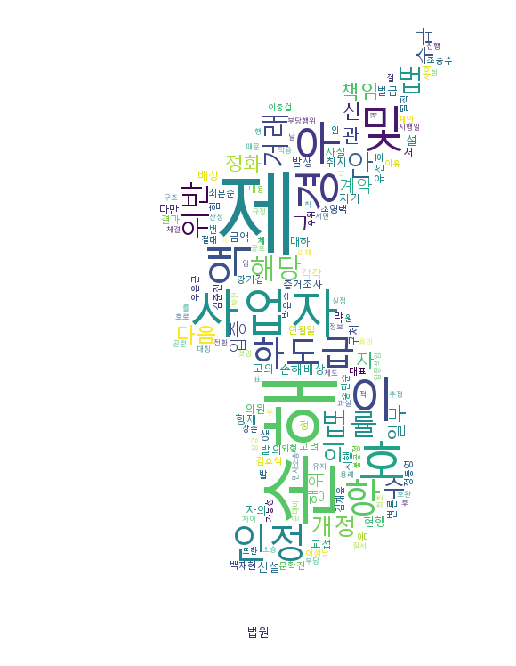

In [65]:
plt.figure(figsize=(12,12))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

In [66]:
#배경그림을 kor_map으로
